<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/dimension_reduction/non_negative_matrix_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NMF(Non-Negative Matrix Factorization)
: NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형

- 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭
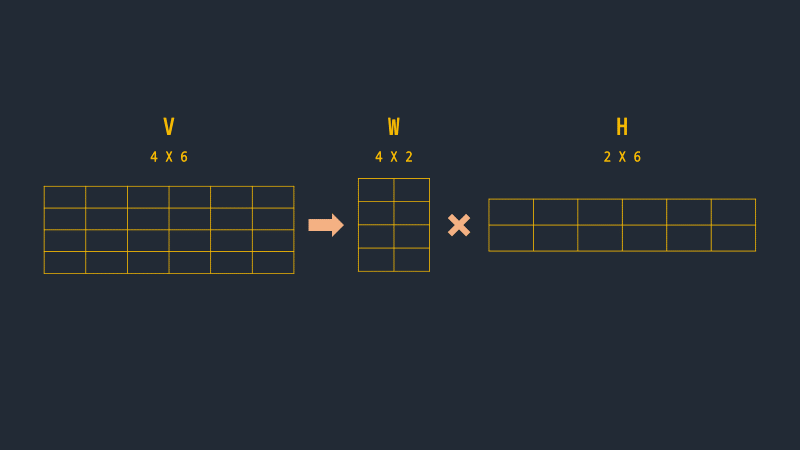

4 X 6 원본 행렬 V는 4 X 2 행렬 W와 2 X 6 행렬 H로 근사해 분해될 수 있음 

행렬분해(Matrix Factorization)는 일반적으로 SVDㅘ 같은 행렬 분해 기법을 통칭하는 것

- 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 아래와 같이 분해
  - W 행렬 : 원본 행렬의 행의 크기와 같고 열의 크기 보다 작은 행렬
  - H 행렬 : 원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬

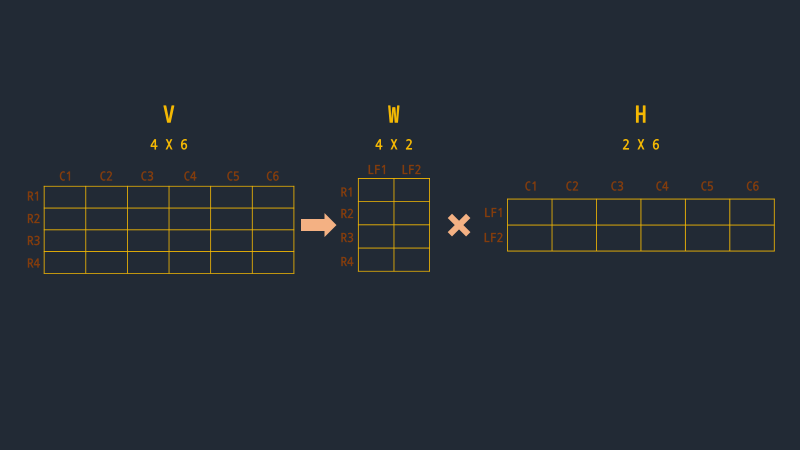

분해된 행렬은 잠재 요소를 특성으로 가지게 됨  
분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며,  
분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지 나타내는 행렬

## 코드 구현

NMF 역시 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 들의 영역에서 사용되고 있음  

- 붓꽃 데이터를 활용

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


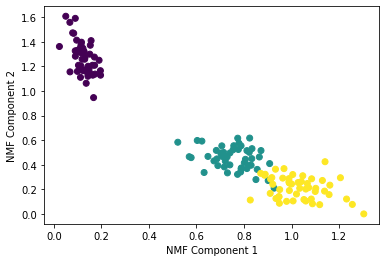

In [1]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf =NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x = iris_nmf[:, 0], y=iris_nmf[:, 1], c= iris.target)
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")
plt.show()

NMF는 영화 추천과 같은 추천(Recommendations) 영역에 활발하게 적용됨
- 사용자의 상품(예: 영화) 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를  
행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해  
평가 순위(Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식

**이를 잠재요소(Latent Factoring) 기반의 추천방식이라고 함**